In [1]:
import pandas as pd

# Use the direct download link format for Google Drive files
# Replace 'FILE_ID' with the actual file ID from your share link
file_id = '1e6j3tJbydBU_QBcppvsGL22LLgm-StNV'
direct_download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Read the CSV directly using the download URL
df_ori = pd.read_csv(direct_download_url)
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146599 entries, 0 to 146598
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   session_id_hash  146599 non-null  object 
 1   (1, 1)           146599 non-null  int64  
 2   (1, 2)           146599 non-null  int64  
 3   (2, 1)           146599 non-null  int64  
 4   (2, 6)           146599 non-null  int64  
 5   (6, 1)           146599 non-null  int64  
 6   (2, 2)           146599 non-null  int64  
 7   (2, 3)           146599 non-null  int64  
 8   (3, 1)           146599 non-null  int64  
 9   (1, 6)           146599 non-null  int64  
 10  (6, 2)           146599 non-null  int64  
 11  (1, 4)           146599 non-null  int64  
 12  (4, 1)           146599 non-null  int64  
 13  (1, 3)           146599 non-null  int64  
 14  (3, 3)           146599 non-null  int64  
 15  (3, 2)           146599 non-null  int64  
 16  (6, 3)           146599 non-null  int6

In [2]:
df_ori.describe()

,"(1, 1)","(1, 2)","(2, 1)","(2, 6)","(6, 1)","(2, 2)","(2, 3)","(3, 1)","(1, 6)","(6, 2)",...,"(6, 6)","(3, 6)","(4, 3)",add,click,detail,pageview,remove,is_purchase,time
count,146599.000000,146599.000000,146599.000000,146599.000000,146599.000000,146599.000000,146599.000000,146599.000000,146599.000000,146599.000000,...,146599.000000,146599.000000,146599.0,146599.000000,146599.000000,146599.000000,146599.000000,146599.000000,146599.000000,146599.000000
mean,4.794644,3.998772,3.578114,0.148432,0.111017,0.844753,0.251577,0.231966,0.080635,0.091372,...,0.000266,0.000061,0.0,0.726165,0.231291,5.119319,9.775810,0.143166,0.031753,11.460387
std,4.306719,4.051602,3.885743,0.679454,0.579627,2.643331,0.803556,0.764603,0.432088,0.460437,...,0.016721,0.007835,0.0,5.425543,0.993473,4.886573,6.435454,0.883411,0.175343,7.884620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007750
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,4.918767
50%,4.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,4.000000,8.000000,0.000000,0.000000,9.434867
75%,6.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,7.000000,12.000000,0.000000,0.000000,16.807208
max,81.000000,52.000000,52.000000,20.000000,19.000000,111.000000,16.000000,18.000000,14.000000,14.000000,...,2.000000,1.000000,0.0,147.000000,30.000000,113.000000,82.000000,45.000000,1.000000,30.999733


In [3]:
df=df_ori.copy()

## 불균형 고려안한 버전

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

# X: 입력 데이터 (is_purchase 제외한 열), y: 라벨 (0 또는 1)
X = df.drop(columns=['is_purchase','session_id_hash']).values.astype(np.float32)
y = df['is_purchase'].values.astype(np.float32)

In [ ]:
class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = X if isinstance(X, torch.Tensor) else torch.tensor(X, dtype=torch.float32)
        self.y = y if isinstance(y, torch.Tensor) else torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# 먼저 전체 데이터를 train+val(80%) / test(20%)로 나눔
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 그 다음 train+val에서 train(75%) / val(25%) => 전체 기준으로 보면 train:60%, val:20%, test:20%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# StandardScaler 객체 생성
scaler = RobustScaler()

# 🌟🌟🌟 훈련 데이터에만 fit_transform 적용 🌟🌟🌟
X_train = scaler.fit_transform(X_train)

# 🌟🌟🌟 검증 및 테스트 데이터에 transform 적용 🌟🌟🌟
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Dataset 생성
train_dataset = TabularDataset(X_train, y_train)
val_dataset = TabularDataset(X_val, y_val)
test_dataset = TabularDataset(X_test, y_test)

# DataLoader
batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
print("train 데이터의 1클래스 개수:",  np.bincount(y_train.astype(int)))     # 클래스별 개수 (원본)

train 데이터의 1클래스 개수: [85164  2795]


## SGD 기본 모델

### Train MLP

In [ ]:
model = nn.Sequential(
    nn.Linear(29, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

In [ ]:
loss = torch.nn.BCEWithLogitsLoss()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 15

In [ ]:
# 손실 기록을 위한 리스트 생성
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train() # 모델을 학습 모드로 설정
    total_batch = len(train_dataset) // batch_size
    running_train_loss = 0.0

    for i, (batch_X, batch_y) in enumerate(train_loader):
        X = batch_X
        Y = batch_y.unsqueeze(1)

        #forward
        pre = model(X)
        cost = loss(pre, Y)

        #backward & optimize
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        running_train_loss += cost.item()

        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], Iter [%d/%d], Train Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

    # 에폭마다 평균 학습 손실 기록
    epoch_train_loss = running_train_loss / total_batch
    train_losses.append(epoch_train_loss)

    # ====== 검증 데이터셋 평가 ======
    model.eval() # 모델을 평가 모드로 설정
    running_val_loss = 0.0
    with torch.no_grad(): # 기울기 계산 비활성화
        for batch_X_val, batch_y_val in val_loader:
            X_val = batch_X_val
            Y_val = batch_y_val.unsqueeze(1)

            pre_val = model(X_val)
            val_cost = loss(pre_val, Y_val)
            running_val_loss += val_cost.item()

    # 에폭마다 평균 검증 손실 기록
    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)

    print('Epoch [%d/%d], Average Train Loss: %.4f, Average Val Loss: %.4f'
         %(epoch+1, num_epochs, epoch_train_loss, epoch_val_loss))

print("Learning Finished!")

Epoch [1/15], Iter [100/171], Train Loss: 0.6976
Epoch [1/15], Average Train Loss: 0.7064, Average Val Loss: 0.6753
Epoch [2/15], Iter [100/171], Train Loss: 0.6478
Epoch [2/15], Average Train Loss: 0.6543, Average Val Loss: 0.6271
Epoch [3/15], Iter [100/171], Train Loss: 0.6015
Epoch [3/15], Average Train Loss: 0.6084, Average Val Loss: 0.5842
Epoch [4/15], Iter [100/171], Train Loss: 0.5607
Epoch [4/15], Average Train Loss: 0.5673, Average Val Loss: 0.5455
Epoch [5/15], Iter [100/171], Train Loss: 0.5305
Epoch [5/15], Average Train Loss: 0.5301, Average Val Loss: 0.5103
Epoch [6/15], Iter [100/171], Train Loss: 0.4909
Epoch [6/15], Average Train Loss: 0.4962, Average Val Loss: 0.4782
Epoch [7/15], Iter [100/171], Train Loss: 0.4602
Epoch [7/15], Average Train Loss: 0.4651, Average Val Loss: 0.4487
Epoch [8/15], Iter [100/171], Train Loss: 0.4335
Epoch [8/15], Average Train Loss: 0.4366, Average Val Loss: 0.4217
Epoch [9/15], Iter [100/171], Train Loss: 0.4120
Epoch [9/15], Average T

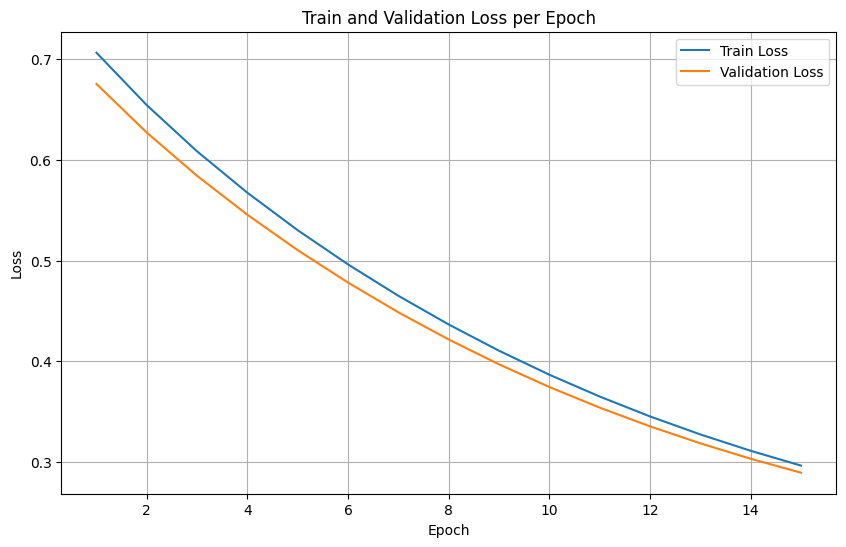

In [ ]:
import matplotlib.pyplot as plt

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

- average train loss: 15번째 에폭까지 꾸준히 감소함.

- average val loss: 15번째 에폭까지 꾸준히 감소함.

epoch 15에서는 과적합 발생 x

### Evaluate MLP

In [ ]:
# 모델을 평가 모드로 설정
model.eval()

# 테스트 데이터셋 평가를 위한 리스트 초기화
all_test_preds = []
all_test_labels = []

# 기울기 계산 비활성화
with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        X_test = batch_X_test
        Y_test = batch_y_test.unsqueeze(1)

        # 모델 예측
        pre_test = model(X_test)

        # 예측값 (로짓)을 확률로 변환하고 임계값 0.5로 클래스 결정
        predicted_probs_test = torch.sigmoid(pre_test)
        predicted_classes_test = (predicted_probs_test > 0.5).float()

        # 결과 저장
        all_test_preds.extend(predicted_classes_test.cpu().numpy())
        all_test_labels.extend(batch_y_test.cpu().numpy())

# 테스트 데이터셋에 대한 성능 지표 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

test_accuracy = accuracy_score(all_test_labels, all_test_preds)
test_precision = precision_score(all_test_labels, all_test_preds)
test_recall = recall_score(all_test_labels, all_test_preds)
test_f1 = f1_score(all_test_labels, all_test_preds)
test_conf_matrix = confusion_matrix(all_test_labels, all_test_preds)

# 테스트 성능 지표 출력
print("\n--- Test Set Evaluation ---")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Test Set Evaluation ---
Test Accuracy: 0.9684
Test Precision: 0.0000
Test Recall: 0.0000
Test F1-Score: 0.0000
Confusion Matrix:
[[28393     0]
 [  927     0]]


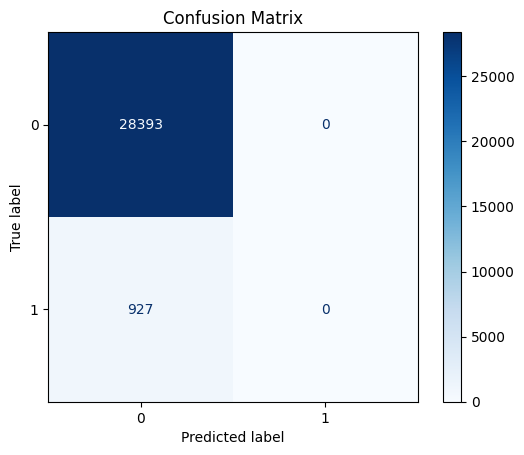

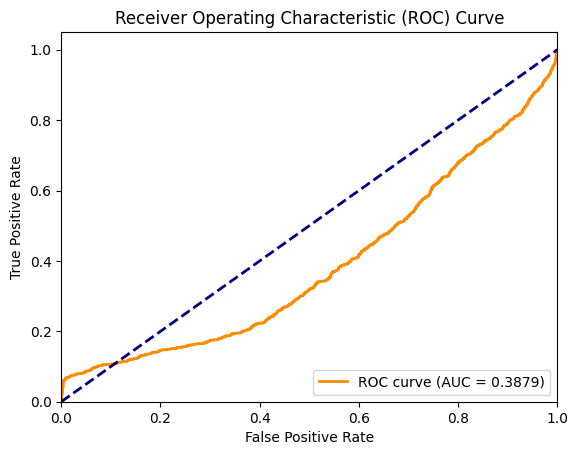

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

model.eval()
with torch.no_grad():
    y_true = []
    y_pred = []
    y_prob = []

    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)              # [batch_size, 1]
        probs = torch.sigmoid(outputs)        # 확률로 변환
        preds = (probs > 0.5).float()

        y_true.extend(y_batch.tolist())
        y_pred.extend(preds.squeeze().tolist())
        y_prob.extend(probs.squeeze().tolist())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 불균형 고려한 버전

## SGD - 오버샘플링

In [ ]:
import pandas as pd
import numpy as np

df=df_ori.copy()

# df의 정보와 shape를 다시 확인하여 데이터가 제대로 로드되었는지 확인합니다.
df.info()
print(df.shape)

# X와 y를 원본 df에서 다시 분리합니다.
X = df.drop(columns=['is_purchase','session_id_hash']).values.astype(np.float32)
y = df['is_purchase'].values.astype(np.float32)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146599 entries, 0 to 146598
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   session_id_hash  146599 non-null  object 
 1   (1, 1)           146599 non-null  int64  
 2   (1, 2)           146599 non-null  int64  
 3   (2, 1)           146599 non-null  int64  
 4   (2, 6)           146599 non-null  int64  
 5   (6, 1)           146599 non-null  int64  
 6   (2, 2)           146599 non-null  int64  
 7   (2, 3)           146599 non-null  int64  
 8   (3, 1)           146599 non-null  int64  
 9   (1, 6)           146599 non-null  int64  
 10  (6, 2)           146599 non-null  int64  
 11  (1, 4)           146599 non-null  int64  
 12  (4, 1)           146599 non-null  int64  
 13  (1, 3)           146599 non-null  int64  
 14  (3, 3)           146599 non-null  int64  
 15  (3, 2)           146599 non-null  int64  
 16  (6, 3)           146599 non-null  int6

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader # Dataset과 DataLoader를 임포트
import numpy as np

class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# 1단계: train+val vs test (test 20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2단계: train vs val (val 25% of temp → 0.25 * 0.8 = 0.2 overall)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# StandardScaler 객체 생성
scaler = RobustScaler()

# 🌟🌟🌟 훈련 데이터에만 fit_transform 적용 🌟🌟🌟
X_train = scaler.fit_transform(X_train)

# 🌟🌟🌟 검증 및 테스트 데이터에 transform 적용 🌟🌟🌟
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
c=np.bincount(y_train.astype(int))
print("train 데이터의 1클래스 개수:",c )

train 데이터의 1클래스 개수: [85166  2793]


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# 3단계: 오버샘플링 (Train만)
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

# 4단계: Dataset / DataLoader
batch_size = 512

train_dataset = TabularDataset(X_train_over, y_train_over)
val_dataset = TabularDataset(X_val, y_val)
test_dataset = TabularDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
a=np.bincount(y_train.astype(int))
b=np.bincount(y_train_over.astype(int))

# Convert y_train and y_train_over to integer type before using np.bincount
print("오버 샘플링 전 1클래스 개수:", a)
print("오버 샘플링 후 1클래스 개수:", b)

오버 샘플링 전 1클래스 개수: [85166  2793]
오버 샘플링 후 1클래스 개수: [85166 85166]


In [ ]:
model = nn.Sequential(
nn.Linear(29, 64),
nn.ReLU(),
nn.Linear(64, 32),
nn.ReLU(),
nn.Linear(32, 1)
)
loss = torch.nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 15

In [ ]:
# 손실 기록을 위한 리스트 생성
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train() # 모델을 학습 모드로 설정
    total_batch = len(train_dataset) // batch_size
    running_train_loss = 0.0

    for i, (batch_X, batch_y) in enumerate(train_loader):
        X = batch_X
        Y = batch_y.unsqueeze(1)

        #forward
        pre = model(X)
        cost = loss(pre, Y)

        #backward & optimize
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        running_train_loss += cost.item()

        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], Iter [%d/%d], Train Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

    # 에폭마다 평균 학습 손실 기록
    epoch_train_loss = running_train_loss / total_batch
    train_losses.append(epoch_train_loss)

    # ====== 검증 데이터셋 평가 ======
    model.eval() # 모델을 평가 모드로 설정
    running_val_loss = 0.0
    with torch.no_grad(): # 기울기 계산 비활성화
        for batch_X_val, batch_y_val in val_loader:
            X_val = batch_X_val
            Y_val = batch_y_val.unsqueeze(1)

            pre_val = model(X_val)
            val_cost = loss(pre_val, Y_val)
            running_val_loss += val_cost.item()

    # 에폭마다 평균 검증 손실 기록
    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)

    print('Epoch [%d/%d], Average Train Loss: %.4f, Average Val Loss: %.4f'
         %(epoch+1, num_epochs, epoch_train_loss, epoch_val_loss))

print("Learning Finished!")

Epoch [1/15], Iter [100/332], Train Loss: 0.6742
Epoch [1/15], Iter [200/332], Train Loss: 0.6713
Epoch [1/15], Iter [300/332], Train Loss: 0.6675
Epoch [1/15], Average Train Loss: 0.6741, Average Val Loss: 0.6640
Epoch [2/15], Iter [100/332], Train Loss: 0.6603
Epoch [2/15], Iter [200/332], Train Loss: 0.6628
Epoch [2/15], Iter [300/332], Train Loss: 0.6542
Epoch [2/15], Average Train Loss: 0.6631, Average Val Loss: 0.6726
Epoch [3/15], Iter [100/332], Train Loss: 0.6389
Epoch [3/15], Iter [200/332], Train Loss: 0.6557
Epoch [3/15], Iter [300/332], Train Loss: 0.6445
Epoch [3/15], Average Train Loss: 0.6550, Average Val Loss: 0.6768
Epoch [4/15], Iter [100/332], Train Loss: 0.6548
Epoch [4/15], Iter [200/332], Train Loss: 0.6432
Epoch [4/15], Iter [300/332], Train Loss: 0.6324
Epoch [4/15], Average Train Loss: 0.6476, Average Val Loss: 0.6778
Epoch [5/15], Iter [100/332], Train Loss: 0.6601
Epoch [5/15], Iter [200/332], Train Loss: 0.6246
Epoch [5/15], Iter [300/332], Train Loss: 0.63

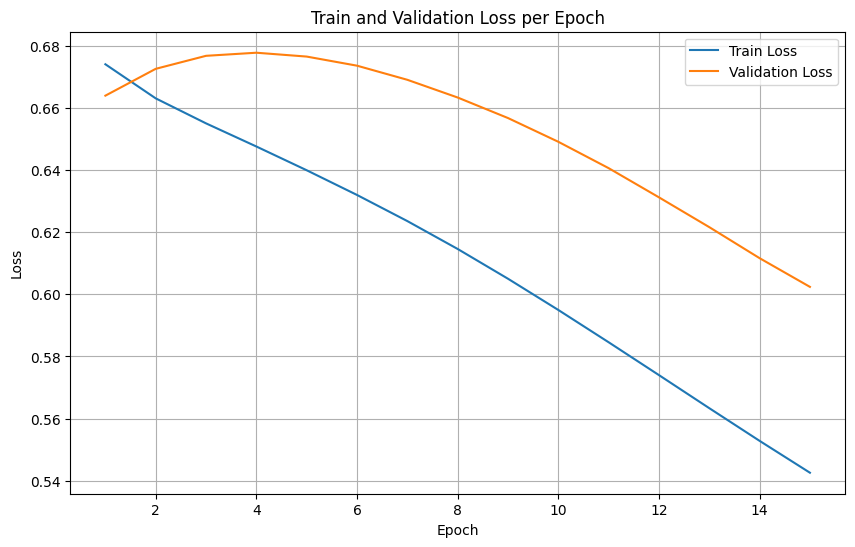

In [ ]:
import matplotlib.pyplot as plt

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 모델을 평가 모드로 설정
model.eval()

# 테스트 데이터셋 평가를 위한 리스트 초기화
all_test_preds = []
all_test_labels = []

# 기울기 계산 비활성화
with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        X_test = batch_X_test
        Y_test = batch_y_test.unsqueeze(1)

        # 모델 예측
        pre_test = model(X_test)

        # 예측값 (로짓)을 확률로 변환하고 임계값 0.5로 클래스 결정
        predicted_probs_test = torch.sigmoid(pre_test)
        predicted_classes_test = (predicted_probs_test > 0.5).float()

        # 결과 저장
        all_test_preds.extend(predicted_classes_test.cpu().numpy())
        all_test_labels.extend(batch_y_test.cpu().numpy())

# 테스트 데이터셋에 대한 성능 지표 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

test_accuracy = accuracy_score(all_test_labels, all_test_preds)
test_precision = precision_score(all_test_labels, all_test_preds)
test_recall = recall_score(all_test_labels, all_test_preds)
test_f1 = f1_score(all_test_labels, all_test_preds)
test_conf_matrix = confusion_matrix(all_test_labels, all_test_preds)

# 테스트 성능 지표 출력
print("\n--- Test Set Evaluation ---")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)


--- Test Set Evaluation ---
Test Accuracy: 0.8469
Test Precision: 0.1520
Test Recall: 0.8346
Test F1-Score: 0.2572
Confusion Matrix:
[[24055  4334]
 [  154   777]]


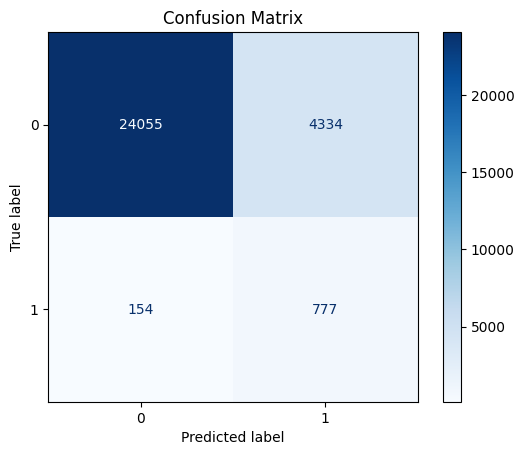

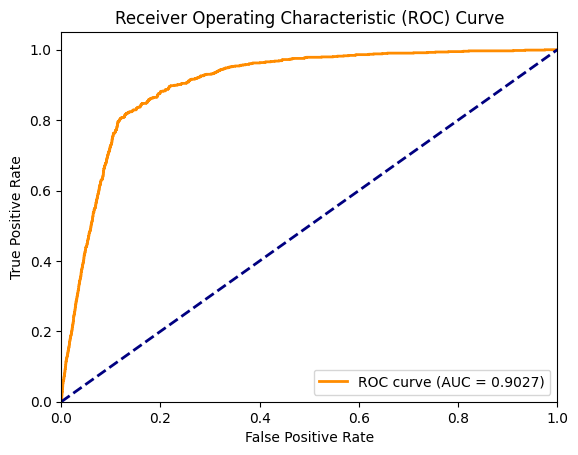

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

model.eval()
with torch.no_grad():
    y_true = []
    y_pred = []
    y_prob = []

    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)              # [batch_size, 1]
        probs = torch.sigmoid(outputs)        # 확률로 변환
        preds = (probs > 0.5).float()

        y_true.extend(y_batch.tolist())
        y_pred.extend(preds.squeeze().tolist())
        y_prob.extend(probs.squeeze().tolist())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Best F1-score: 0.3092 at threshold 0.5677
Average Precision (AUPRC): 0.2108


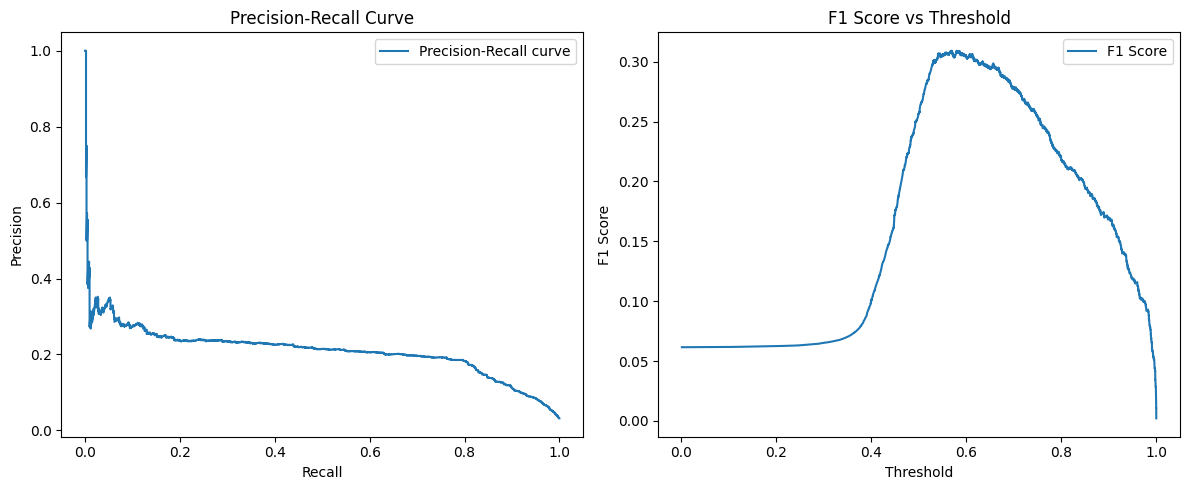

In [ ]:
import torch
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

model.eval()
all_labels = []
all_probs = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:  # test_loader는 테스트 데이터 DataLoader
        outputs = model(X_batch)
        probs = torch.sigmoid(outputs).cpu().numpy()  # 0~1 확률값으로 변환
        labels = y_batch.cpu().numpy()

        all_probs.extend(probs.flatten())
        all_labels.extend(labels.flatten())

all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# Precision-Recall curve 계산
precision, recall, thresholds = precision_recall_curve(all_labels, all_probs)
avg_precision = average_precision_score(all_labels, all_probs)

# F1-score 계산 (threshold 별로)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# 가장 좋은 F1-score와 해당 threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 1.0
best_f1 = f1_scores[best_idx]

print(f'Best F1-score: {best_f1:.4f} at threshold {best_threshold:.4f}')
print(f'Average Precision (AUPRC): {avg_precision:.4f}')

# 그래프 그리기
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')  # thresholds는 len = precision/recall -1 임
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()

plt.tight_layout()
plt.show()


## SGD - pos_weight

In [ ]:
df=df_ori.copy()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

# X: 입력 데이터 (is_purchase 제외한 열), y: 라벨 (0 또는 1)
# Changed the columns argument to a list of strings instead of a list of lists
X = df.drop(columns=['is_purchase','session_id_hash']).values.astype(np.float32)
y = df['is_purchase'].values.astype(np.float32)

In [ ]:
from sklearn.model_selection import train_test_split

# 먼저 전체 데이터를 train+val(80%) / test(20%)로 나눔
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 그 다음 train+val에서 train(75%) / val(25%) => 전체 기준으로 보면 train:60%, val:20%, test:20%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# StandardScaler 객체 생성
scaler = RobustScaler()

# 🌟🌟🌟 훈련 데이터에만 fit_transform 적용 🌟🌟🌟
X_train = scaler.fit_transform(X_train)

# 🌟🌟🌟 검증 및 테스트 데이터에 transform 적용 🌟🌟🌟
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Dataset 생성
train_dataset = TabularDataset(X_train, y_train)
val_dataset = TabularDataset(X_val, y_val)
test_dataset = TabularDataset(X_test, y_test)

# DataLoader
batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
c=np.bincount(y_temp.astype(int))
print("train 데이터의 1클래스 개수:",c )      # 클래스별 개수 (원본)

train 데이터의 1클래스 개수: [113551   3728]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. model
model = nn.Sequential(
    nn.Linear(29, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# 2. pos_weight 계산
neg_count = (torch.tensor(y_train) == 0).sum()
pos_count = (torch.tensor(y_train) == 1).sum()

# 0으로 나누는 경우를 방지하기 위해 확인
if pos_count == 0:
    print("경고: y_train에 클래스 1 샘플이 없습니다. pos_weight를 계산할 수 없습니다.")
    pos_weight = torch.tensor([1.0], dtype=torch.float) # 또는 다른 기본값 설정
else:
    pos_weight = torch.tensor([neg_count / pos_count], dtype=torch.float)

print(f"계산된 pos_weight: {pos_weight.item():.4f}")

#  3. 손실 함수 및 옵티마이저
loss = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.SGD(model.parameters(), lr=0.001)

#  4. 학습 설정
num_epochs = 15
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    total_batch = len(train_loader)

    for batch_X, batch_y in train_loader:
        # DataLoader에서 이미 Tensor로 제공하므로 float()만 필요
        X = batch_X.float()
        # target은 unsqueeze(1)와 float() 필요
        Y = batch_y.unsqueeze(1).float()

        pre = model(X)
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        running_train_loss += cost.item()

    epoch_train_loss = running_train_loss / total_batch
    train_losses.append(epoch_train_loss)

    # 검증
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for batch_X_val, batch_y_val in val_loader:
             # DataLoader에서 이미 Tensor로 제공하므로 float()만 필요
            X_val = batch_X_val.float()
            # target은 unsqueeze(1)와 float() 필요
            Y_val = batch_y_val.unsqueeze(1).float()

            pre_val = model(X_val)
            val_cost = loss(pre_val, Y_val)
            running_val_loss += val_cost.item()

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}] | Train Loss: {epoch_train_loss:.4f} | Val Loss: {epoch_val_loss:.4f}')

print("✅ Training Finished!")

#  테스트 평가
model.eval()
all_test_preds = []
all_test_labels = []

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # DataLoader에서 이미 Tensor로 제공하므로 float()만 필요
        X_test = batch_X_test.float()
        # target은 unsqueeze(1)와 float() 필요
        Y_test = batch_y_test.unsqueeze(1).float()


        pre_test = model(X_test)
        predicted_probs_test = torch.sigmoid(pre_test)
        predicted_classes_test = (predicted_probs_test > 0.5).float()

        all_test_preds.extend(predicted_classes_test.cpu().numpy())
        all_test_labels.extend(batch_y_test.cpu().numpy())

#  성능 지표 출력
test_accuracy = accuracy_score(all_test_labels, all_test_preds)
test_precision = precision_score(all_test_labels, all_test_preds, zero_division=0)
test_recall = recall_score(all_test_labels, all_test_preds, zero_division=0)
test_f1 = f1_score(all_test_labels, all_test_preds, zero_division=0)
test_conf_matrix = confusion_matrix(all_test_labels, all_test_preds)

print("\n---  Test Set Evaluation ---")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1-Score : {test_f1:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)

계산된 pos_weight: 30.4701
Epoch [1/15] | Train Loss: 1.3269 | Val Loss: 1.3204
Epoch [2/15] | Train Loss: 1.3144 | Val Loss: 1.3084
Epoch [3/15] | Train Loss: 1.3031 | Val Loss: 1.2976
Epoch [4/15] | Train Loss: 1.2925 | Val Loss: 1.2870
Epoch [5/15] | Train Loss: 1.2814 | Val Loss: 1.2760
Epoch [6/15] | Train Loss: 1.2703 | Val Loss: 1.2645
Epoch [7/15] | Train Loss: 1.2576 | Val Loss: 1.2520
Epoch [8/15] | Train Loss: 1.2447 | Val Loss: 1.2385
Epoch [9/15] | Train Loss: 1.2300 | Val Loss: 1.2239
Epoch [10/15] | Train Loss: 1.2146 | Val Loss: 1.2080
Epoch [11/15] | Train Loss: 1.1975 | Val Loss: 1.1910
Epoch [12/15] | Train Loss: 1.1797 | Val Loss: 1.1731
Epoch [13/15] | Train Loss: 1.1608 | Val Loss: 1.1544
Epoch [14/15] | Train Loss: 1.1414 | Val Loss: 1.1352
Epoch [15/15] | Train Loss: 1.1216 | Val Loss: 1.1157
✅ Training Finished!

--- ✅ Test Set Evaluation ---
Accuracy : 0.8082
Precision: 0.1284
Recall   : 0.8759
F1-Score : 0.2240
Confusion Matrix:
[[22883  5510]
 [  115   812]]


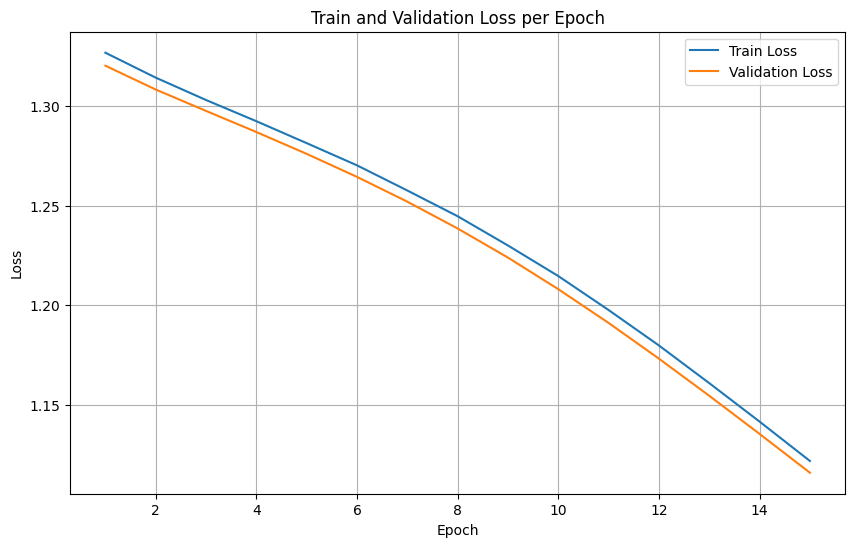

In [ ]:
import matplotlib.pyplot as plt

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

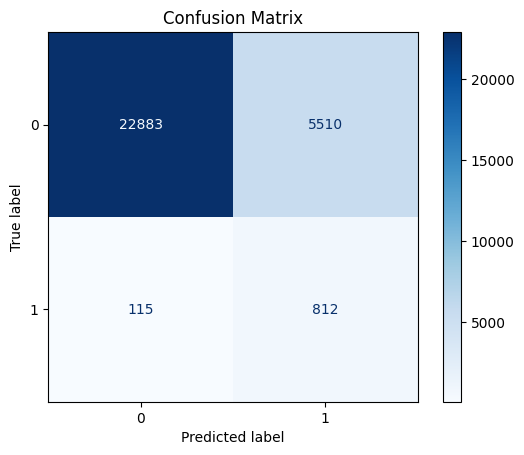

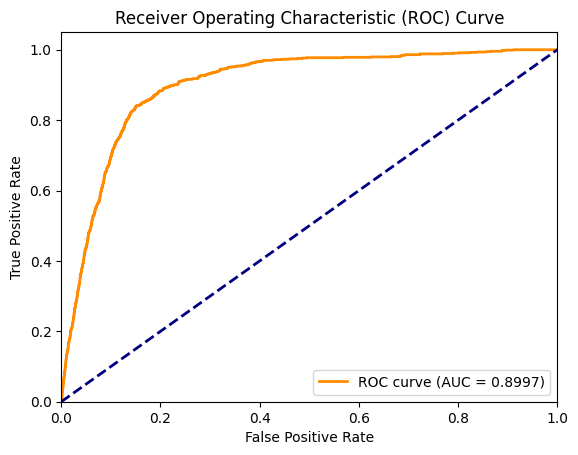

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

model.eval()
with torch.no_grad():
    y_true = []
    y_pred = []
    y_prob = []

    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)              # [batch_size, 1]
        probs = torch.sigmoid(outputs)        # 확률로 변환
        preds = (probs > 0.5).float()

        y_true.extend(y_batch.tolist())
        y_pred.extend(preds.squeeze().tolist())
        y_prob.extend(probs.squeeze().tolist())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Best F1-score: 0.3029 at threshold 0.6119
Average Precision (AUPRC): 0.2040


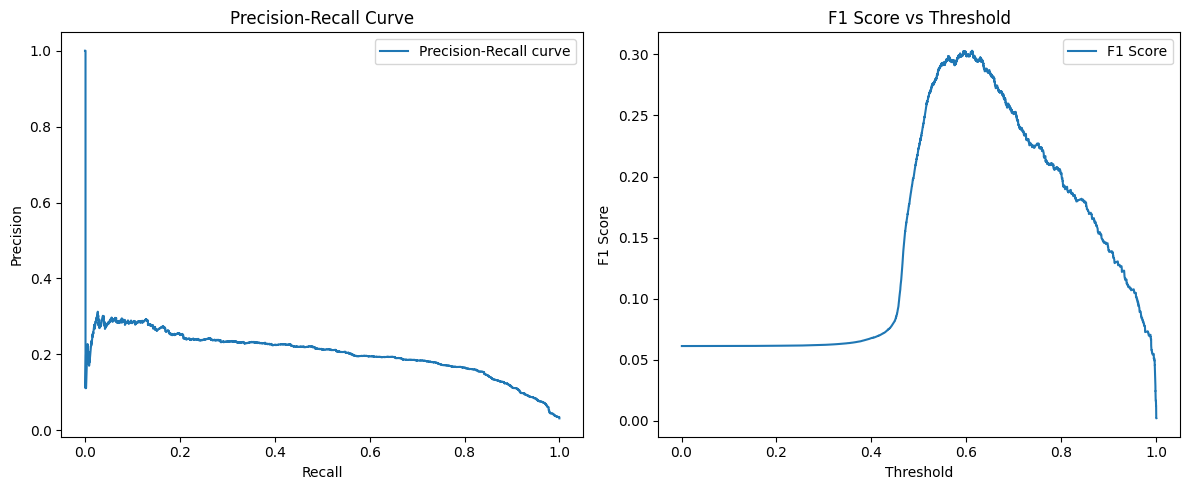

In [ ]:
import torch
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

model.eval()
all_labels = []
all_probs = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:  # test_loader는 테스트 데이터 DataLoader
        outputs = model(X_batch)
        probs = torch.sigmoid(outputs).cpu().numpy()  # 0~1 확률값으로 변환
        labels = y_batch.cpu().numpy()

        all_probs.extend(probs.flatten())
        all_labels.extend(labels.flatten())

all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# Precision-Recall curve 계산
precision, recall, thresholds = precision_recall_curve(all_labels, all_probs)
avg_precision = average_precision_score(all_labels, all_probs)

# F1-score 계산 (threshold 별로)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# 가장 좋은 F1-score와 해당 threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 1.0
best_f1 = f1_scores[best_idx]

print(f'Best F1-score: {best_f1:.4f} at threshold {best_threshold:.4f}')
print(f'Average Precision (AUPRC): {avg_precision:.4f}')

# 그래프 그리기
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')  # thresholds는 len = precision/recall -1 임
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()

plt.tight_layout()
plt.show()


## ADAM - 오버샘플링

In [ ]:
import pandas as pd
import numpy as np

df=df_ori.copy()

# X와 y를 원본 df에서 다시 분리합니다.
X = df.drop(columns=['is_purchase','session_id_hash']).values.astype(np.float32)
y = df['is_purchase'].values.astype(np.float32)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader # Dataset과 DataLoader를 임포트
import numpy as np

class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# 1단계: train+val vs test (test 20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2단계: train vs val (val 25% of temp → 0.25 * 0.8 = 0.2 overall)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# StandardScaler 객체 생성
scaler = RobustScaler()

# 🌟🌟🌟 훈련 데이터에만 fit_transform 적용 🌟🌟🌟
X_train = scaler.fit_transform(X_train)

# 🌟🌟🌟 검증 및 테스트 데이터에 transform 적용 🌟🌟🌟
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# 3단계: 오버샘플링 (Train만)
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

# 4단계: Dataset / DataLoader
batch_size = 512

train_dataset = TabularDataset(X_train_over, y_train_over)
val_dataset = TabularDataset(X_val, y_val)
test_dataset = TabularDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### lr=0.001

In [ ]:
model = nn.Sequential(
nn.Linear(29, 64),
nn.ReLU(),
nn.Linear(64, 32),
nn.ReLU(),
nn.Linear(32, 1)
)
loss = torch.nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 15

In [ ]:
# 손실 기록을 위한 리스트 생성
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train() # 모델을 학습 모드로 설정
    total_batch = len(train_dataset) // batch_size
    running_train_loss = 0.0

    for i, (batch_X, batch_y) in enumerate(train_loader):
        X = batch_X
        Y = batch_y.unsqueeze(1)

        #forward
        pre = model(X)
        cost = loss(pre, Y)

        #backward & optimize
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        running_train_loss += cost.item()

        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], Iter [%d/%d], Train Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

    # 에폭마다 평균 학습 손실 기록
    epoch_train_loss = running_train_loss / total_batch
    train_losses.append(epoch_train_loss)

    # ====== 검증 데이터셋 평가 ======
    model.eval() # 모델을 평가 모드로 설정
    running_val_loss = 0.0
    with torch.no_grad(): # 기울기 계산 비활성화
        for batch_X_val, batch_y_val in val_loader:
            X_val = batch_X_val
            Y_val = batch_y_val.unsqueeze(1)

            pre_val = model(X_val)
            val_cost = loss(pre_val, Y_val)
            running_val_loss += val_cost.item()

    # 에폭마다 평균 검증 손실 기록
    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)

    print('Epoch [%d/%d], Average Train Loss: %.4f, Average Val Loss: %.4f'
         %(epoch+1, num_epochs, epoch_train_loss, epoch_val_loss))

print("Learning Finished!")

Epoch [1/15], Iter [100/332], Train Loss: 0.3652
Epoch [1/15], Iter [200/332], Train Loss: 0.2804
Epoch [1/15], Iter [300/332], Train Loss: 0.2405
Epoch [1/15], Average Train Loss: 0.3584, Average Val Loss: 0.2445
Epoch [2/15], Iter [100/332], Train Loss: 0.2017
Epoch [2/15], Iter [200/332], Train Loss: 0.2031
Epoch [2/15], Iter [300/332], Train Loss: 0.1853
Epoch [2/15], Average Train Loss: 0.2290, Average Val Loss: 0.2123
Epoch [3/15], Iter [100/332], Train Loss: 0.2260
Epoch [3/15], Iter [200/332], Train Loss: 0.2154
Epoch [3/15], Iter [300/332], Train Loss: 0.2024
Epoch [3/15], Average Train Loss: 0.2064, Average Val Loss: 0.2333
Epoch [4/15], Iter [100/332], Train Loss: 0.2504
Epoch [4/15], Iter [200/332], Train Loss: 0.2095
Epoch [4/15], Iter [300/332], Train Loss: 0.2126
Epoch [4/15], Average Train Loss: 0.1965, Average Val Loss: 0.2036
Epoch [5/15], Iter [100/332], Train Loss: 0.1756
Epoch [5/15], Iter [200/332], Train Loss: 0.2087
Epoch [5/15], Iter [300/332], Train Loss: 0.20

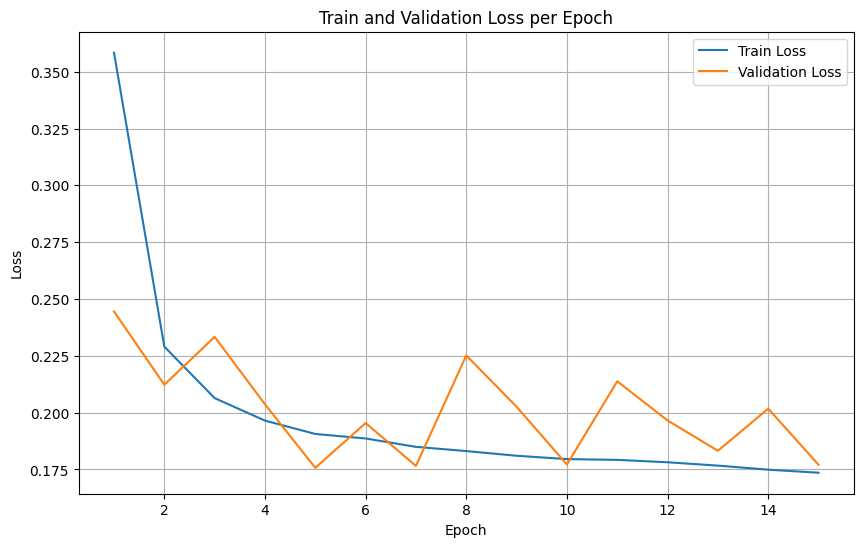

In [ ]:
import matplotlib.pyplot as plt

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 모델을 평가 모드로 설정
model.eval()

# 테스트 데이터셋 평가를 위한 리스트 초기화
all_test_preds = []
all_test_labels = []

# 기울기 계산 비활성화
with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        X_test = batch_X_test
        Y_test = batch_y_test.unsqueeze(1)

        # 모델 예측
        pre_test = model(X_test)

        # 예측값 (로짓)을 확률로 변환하고 임계값 0.5로 클래스 결정
        predicted_probs_test = torch.sigmoid(pre_test)
        predicted_classes_test = (predicted_probs_test > 0.5).float()

        # 결과 저장
        all_test_preds.extend(predicted_classes_test.cpu().numpy())
        all_test_labels.extend(batch_y_test.cpu().numpy())

# 테스트 데이터셋에 대한 성능 지표 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

test_accuracy = accuracy_score(all_test_labels, all_test_preds)
test_precision = precision_score(all_test_labels, all_test_preds)
test_recall = recall_score(all_test_labels, all_test_preds)
test_f1 = f1_score(all_test_labels, all_test_preds)
test_conf_matrix = confusion_matrix(all_test_labels, all_test_preds)

# 테스트 성능 지표 출력
print("\n--- Test Set Evaluation ---")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)


--- Test Set Evaluation ---
Test Accuracy: 0.9356
Test Precision: 0.3173
Test Recall: 0.8937
Test F1-Score: 0.4683
Confusion Matrix:
[[26599  1790]
 [   99   832]]


### 임계값 변경

In [ ]:
# %%
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np # numpy 모듈 임포트

# 모델을 평가 모드로 설정
model.eval()

# 테스트 데이터셋 평가를 위한 리스트 초기화
all_test_preds = []
all_test_labels = []
all_test_probs = [] # 확률 값을 저장할 리스트

# 기울기 계산 비활성화
with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # DataLoader에서 이미 Tensor로 제공하므로 float()만 필요
        X_test = batch_X_test.float()
        # target은 unsqueeze(1)와 float() 필요 (손실 계산 시 필요하지만, 여기서는 레이블 수집만 함)
        # Y_test = batch_y_test.unsqueeze(1).float()

        # 모델 예측 (로짓)
        pre_test = model(X_test)

        # 예측값 (로짓)을 확률로 변환
        predicted_probs_test = torch.sigmoid(pre_test)

        # 결과 저장
        all_test_labels.extend(batch_y_test.cpu().numpy())
        all_test_probs.extend(predicted_probs_test.cpu().numpy())

# numpy 배열로 변환
all_test_labels = np.array(all_test_labels)
all_test_probs = np.array(all_test_probs).flatten() # 1차원 배열로 변환

# ✅ 최적 임계값 설정
optimal_threshold = best_threshold

# ✅ 최적 임계값을 사용하여 클래스 예측
predicted_classes_test_optimal = (all_test_probs > optimal_threshold).astype(float)

# 테스트 데이터셋에 대한 성능 지표 계산 (최적 임계값 사용)
test_accuracy_optimal = accuracy_score(all_test_labels, predicted_classes_test_optimal)
# zero_division=0 매개변수를 추가하여 분모가 0일 때 0을 반환하도록 함
test_precision_optimal = precision_score(all_test_labels, predicted_classes_test_optimal, zero_division=0)
test_recall_optimal = recall_score(all_test_labels, predicted_classes_test_optimal, zero_division=0)
test_f1_optimal = f1_score(all_test_labels, predicted_classes_test_optimal, zero_division=0)
test_conf_matrix_optimal = confusion_matrix(all_test_labels, predicted_classes_test_optimal)

# ✅ 테스트 성능 지표 출력 (최적 임계값 사용)
print(f"\n--- Test Set Evaluation (Threshold = {optimal_threshold:.4f}) ---")
print(f"Accuracy : {test_accuracy_optimal:.4f}")
print(f"Precision: {test_precision_optimal:.4f}")
print(f"Recall   : {test_recall_optimal:.4f}")
print(f"F1-Score : {test_f1_optimal:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix_optimal)


--- Test Set Evaluation (Threshold = 0.9572) ---
Accuracy : 0.9814
Precision: 0.7778
Recall   : 0.5789
F1-Score : 0.6638
Confusion Matrix:
[[28235   154]
 [  392   539]]


### lr=0.0001

In [5]:
import pandas as pd
import numpy as np

df=df_ori.copy()

# X와 y를 원본 df에서 다시 분리합니다.
X = df.drop(columns=['is_purchase','session_id_hash']).values.astype(np.float32)
y = df['is_purchase'].values.astype(np.float32)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader # Dataset과 DataLoader를 임포트
import numpy as np

class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [7]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# 1단계: train+val vs test (test 20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2단계: train vs val (val 25% of temp → 0.25 * 0.8 = 0.2 overall)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# StandardScaler 객체 생성
scaler = RobustScaler()

# 🌟🌟🌟 훈련 데이터에만 fit_transform 적용 🌟🌟🌟
X_train = scaler.fit_transform(X_train)

# 🌟🌟🌟 검증 및 테스트 데이터에 transform 적용 🌟🌟🌟
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# 3단계: 오버샘플링 (Train만)
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

# 4단계: Dataset / DataLoader
batch_size = 512

train_dataset = TabularDataset(X_train_over, y_train_over)
val_dataset = TabularDataset(X_val, y_val)
test_dataset = TabularDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
model = nn.Sequential(
nn.Linear(29, 64),
nn.ReLU(),
nn.Linear(64, 32),
nn.ReLU(),
nn.Linear(32, 1)
)
loss = torch.nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 15

In [ ]:
# 손실 기록을 위한 리스트 생성
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train() # 모델을 학습 모드로 설정
    total_batch = len(train_dataset) // batch_size
    running_train_loss = 0.0

    for i, (batch_X, batch_y) in enumerate(train_loader):
        X = batch_X
        Y = batch_y.unsqueeze(1)

        #forward
        pre = model(X)
        cost = loss(pre, Y)

        #backward & optimize
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        running_train_loss += cost.item()

        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], Iter [%d/%d], Train Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

    # 에폭마다 평균 학습 손실 기록
    epoch_train_loss = running_train_loss / total_batch
    train_losses.append(epoch_train_loss)

    # ====== 검증 데이터셋 평가 ======
    model.eval() # 모델을 평가 모드로 설정
    running_val_loss = 0.0
    with torch.no_grad(): # 기울기 계산 비활성화
        for batch_X_val, batch_y_val in val_loader:
            X_val = batch_X_val
            Y_val = batch_y_val.unsqueeze(1)

            pre_val = model(X_val)
            val_cost = loss(pre_val, Y_val)
            running_val_loss += val_cost.item()

    # 에폭마다 평균 검증 손실 기록
    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)

    print('Epoch [%d/%d], Average Train Loss: %.4f, Average Val Loss: %.4f'
         %(epoch+1, num_epochs, epoch_train_loss, epoch_val_loss))

print("Learning Finished!")

Epoch [1/15], Iter [100/332], Train Loss: 0.6687
Epoch [1/15], Iter [200/332], Train Loss: 0.6280
Epoch [1/15], Iter [300/332], Train Loss: 0.5742
Epoch [1/15], Average Train Loss: 0.6437, Average Val Loss: 0.5589
Epoch [2/15], Iter [100/332], Train Loss: 0.5027
Epoch [2/15], Iter [200/332], Train Loss: 0.4275
Epoch [2/15], Iter [300/332], Train Loss: 0.3842
Epoch [2/15], Average Train Loss: 0.4720, Average Val Loss: 0.4313
Epoch [3/15], Iter [100/332], Train Loss: 0.3755
Epoch [3/15], Iter [200/332], Train Loss: 0.3945
Epoch [3/15], Iter [300/332], Train Loss: 0.3935
Epoch [3/15], Average Train Loss: 0.3793, Average Val Loss: 0.3677
Epoch [4/15], Iter [100/332], Train Loss: 0.3361
Epoch [4/15], Iter [200/332], Train Loss: 0.3252
Epoch [4/15], Iter [300/332], Train Loss: 0.3378
Epoch [4/15], Average Train Loss: 0.3386, Average Val Loss: 0.3194
Epoch [5/15], Iter [100/332], Train Loss: 0.3389
Epoch [5/15], Iter [200/332], Train Loss: 0.3596
Epoch [5/15], Iter [300/332], Train Loss: 0.30

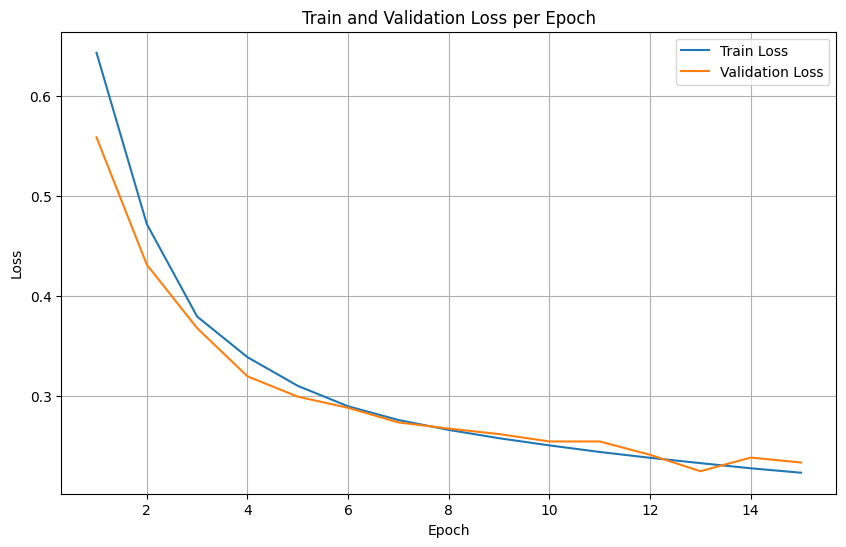

In [ ]:
import matplotlib.pyplot as plt

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 모델을 평가 모드로 설정
model.eval()

# 테스트 데이터셋 평가를 위한 리스트 초기화
all_test_preds = []
all_test_labels = []

# 기울기 계산 비활성화
with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        X_test = batch_X_test
        Y_test = batch_y_test.unsqueeze(1)

        # 모델 예측
        pre_test = model(X_test)

        # 예측값 (로짓)을 확률로 변환하고 임계값 0.5로 클래스 결정
        predicted_probs_test = torch.sigmoid(pre_test)
        predicted_classes_test = (predicted_probs_test > 0.5).float()

        # 결과 저장
        all_test_preds.extend(predicted_classes_test.cpu().numpy())
        all_test_labels.extend(batch_y_test.cpu().numpy())

# 테스트 데이터셋에 대한 성능 지표 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

test_accuracy = accuracy_score(all_test_labels, all_test_preds)
test_precision = precision_score(all_test_labels, all_test_preds)
test_recall = recall_score(all_test_labels, all_test_preds)
test_f1 = f1_score(all_test_labels, all_test_preds)
test_conf_matrix = confusion_matrix(all_test_labels, all_test_preds)

# 테스트 성능 지표 출력
print("\n--- Test Set Evaluation ---")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)


--- Test Set Evaluation ---
Test Accuracy: 0.9158
Test Precision: 0.2624
Test Recall: 0.9119
Test F1-Score: 0.4075
Confusion Matrix:
[[26002  2387]
 [   82   849]]


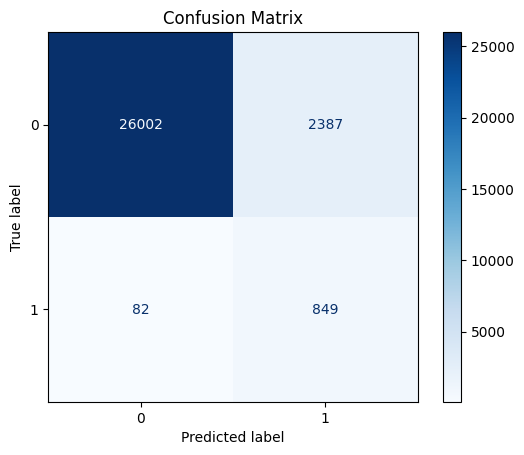

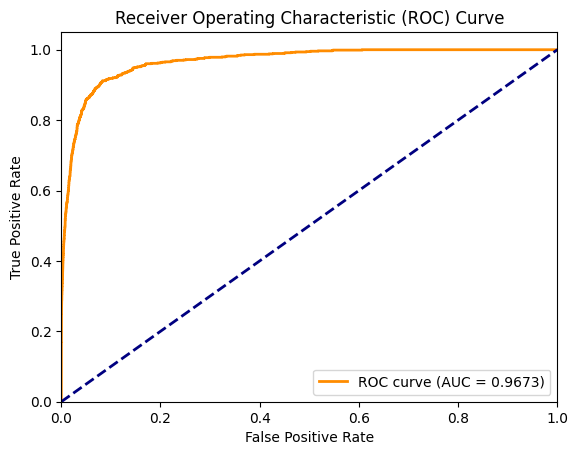

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

model.eval()
with torch.no_grad():
    y_true = []
    y_pred = []
    y_prob = []

    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)              # [batch_size, 1]
        probs = torch.sigmoid(outputs)        # 확률로 변환
        preds = (probs > 0.5).float()

        y_true.extend(y_batch.tolist())
        y_pred.extend(preds.squeeze().tolist())
        y_prob.extend(probs.squeeze().tolist())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Best F1-score: 0.5979 at threshold 0.8972
Average Precision (AUPRC): 0.6621


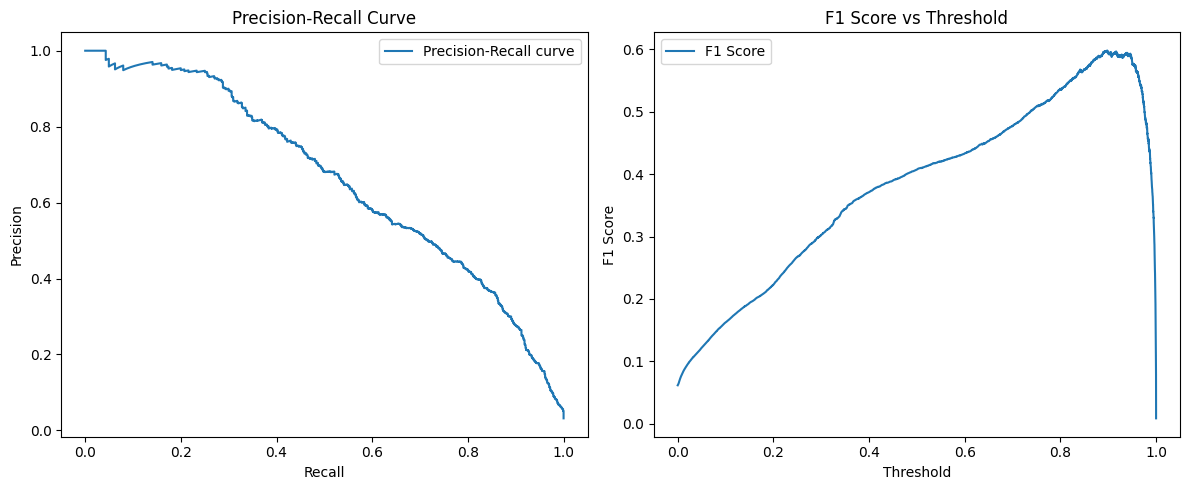

In [ ]:
import torch
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

model.eval()
all_labels = []
all_probs = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:  # test_loader는 테스트 데이터 DataLoader
        outputs = model(X_batch)
        probs = torch.sigmoid(outputs).cpu().numpy()  # 0~1 확률값으로 변환
        labels = y_batch.cpu().numpy()

        all_probs.extend(probs.flatten())
        all_labels.extend(labels.flatten())

all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# Precision-Recall curve 계산
precision, recall, thresholds = precision_recall_curve(all_labels, all_probs)
avg_precision = average_precision_score(all_labels, all_probs)

# F1-score 계산 (threshold 별로)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# 가장 좋은 F1-score와 해당 threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 1.0
best_f1 = f1_scores[best_idx]

print(f'Best F1-score: {best_f1:.4f} at threshold {best_threshold:.4f}')
print(f'Average Precision (AUPRC): {avg_precision:.4f}')

# 그래프 그리기
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')  # thresholds는 len = precision/recall -1 임
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()

plt.tight_layout()
plt.show()


# 성능 튜닝

In [ ]:
import pandas as pd
import numpy as np

df=df_ori.copy()

# X와 y를 원본 df에서ㅁ 다시 분리합니다.
X = df.drop(columns=['is_purchase','session_id_hash']).values.astype(np.float32)
y = df['is_purchase'].values.astype(np.float32)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader # Dataset과 DataLoader를 임포트
import numpy as np

class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# 1단계: train+val vs test (test 20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2단계: train vs val (val 25% of temp → 0.25 * 0.8 = 0.2 overall)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# StandardScaler 객체 생성
scaler = RobustScaler()

# 🌟🌟🌟 훈련 데이터에만 fit_transform 적용 🌟🌟🌟
X_train = scaler.fit_transform(X_train)

# 🌟🌟🌟 검증 및 테스트 데이터에 transform 적용 🌟🌟🌟
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### 은닉층추가, epoch=30

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# 3단계: 오버샘플링 (Train만)
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

# 4단계: Dataset / DataLoader
batch_size = 512

train_dataset = TabularDataset(X_train_over, y_train_over)
val_dataset = TabularDataset(X_val, y_val)
test_dataset = TabularDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
model = nn.Sequential(
    nn.Linear(29, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16), # 새로운 은닉층
    nn.ReLU(),
    nn.Linear(16, 1)
)
loss = torch.nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
num_epochs = 30

In [ ]:
# 손실 기록을 위한 리스트 생성
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train() # 모델을 학습 모드로 설정
    total_batch = len(train_dataset) // batch_size
    running_train_loss = 0.0

    for i, (batch_X, batch_y) in enumerate(train_loader):
        X = batch_X
        Y = batch_y.unsqueeze(1)

        #forward
        pre = model(X)
        cost = loss(pre, Y)

        #backward & optimize
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        running_train_loss += cost.item()

        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], Iter [%d/%d], Train Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

    # 에폭마다 평균 학습 손실 기록
    epoch_train_loss = running_train_loss / total_batch
    train_losses.append(epoch_train_loss)

    # ====== 검증 데이터셋 평가 ======
    model.eval() # 모델을 평가 모드로 설정
    running_val_loss = 0.0
    with torch.no_grad(): # 기울기 계산 비활성화
        for batch_X_val, batch_y_val in val_loader:
            X_val = batch_X_val
            Y_val = batch_y_val.unsqueeze(1)

            pre_val = model(X_val)
            val_cost = loss(pre_val, Y_val)
            running_val_loss += val_cost.item()

    # 에폭마다 평균 검증 손실 기록
    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)

    print('Epoch [%d/%d], Average Train Loss: %.4f, Average Val Loss: %.4f'
         %(epoch+1, num_epochs, epoch_train_loss, epoch_val_loss))

print("Learning Finished!")

Epoch [1/30], Iter [100/332], Train Loss: 0.4801
Epoch [1/30], Iter [200/332], Train Loss: 0.3810
Epoch [1/30], Iter [300/332], Train Loss: 0.2830
Epoch [1/30], Average Train Loss: 0.4240, Average Val Loss: 0.2586
Epoch [2/30], Iter [100/332], Train Loss: 0.2518
Epoch [2/30], Iter [200/332], Train Loss: 0.2371
Epoch [2/30], Iter [300/332], Train Loss: 0.2462
Epoch [2/30], Average Train Loss: 0.2545, Average Val Loss: 0.2227
Epoch [3/30], Iter [100/332], Train Loss: 0.2220
Epoch [3/30], Iter [200/332], Train Loss: 0.2270
Epoch [3/30], Iter [300/332], Train Loss: 0.2166
Epoch [3/30], Average Train Loss: 0.2221, Average Val Loss: 0.2239
Epoch [4/30], Iter [100/332], Train Loss: 0.1824
Epoch [4/30], Iter [200/332], Train Loss: 0.1655
Epoch [4/30], Iter [300/332], Train Loss: 0.2382
Epoch [4/30], Average Train Loss: 0.2044, Average Val Loss: 0.2236
Epoch [5/30], Iter [100/332], Train Loss: 0.2085
Epoch [5/30], Iter [200/332], Train Loss: 0.1431
Epoch [5/30], Iter [300/332], Train Loss: 0.14

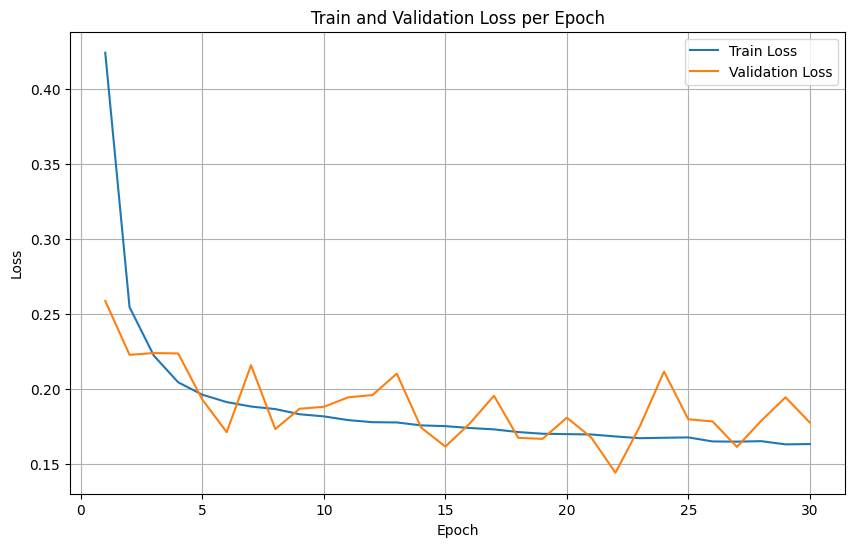

In [ ]:
import matplotlib.pyplot as plt

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 모델을 평가 모드로 설정
model.eval()

# 테스트 데이터셋 평가를 위한 리스트 초기화
all_test_preds = []
all_test_labels = []

# 기울기 계산 비활성화
with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        X_test = batch_X_test
        Y_test = batch_y_test.unsqueeze(1)

        # 모델 예측
        pre_test = model(X_test)

        # 예측값 (로짓)을 확률로 변환하고 임계값 0.5로 클래스 결정
        predicted_probs_test = torch.sigmoid(pre_test)
        predicted_classes_test = (predicted_probs_test > 0.5).float()

        # 결과 저장
        all_test_preds.extend(predicted_classes_test.cpu().numpy())
        all_test_labels.extend(batch_y_test.cpu().numpy())

# 테스트 데이터셋에 대한 성능 지표 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

test_accuracy = accuracy_score(all_test_labels, all_test_preds)
test_precision = precision_score(all_test_labels, all_test_preds)
test_recall = recall_score(all_test_labels, all_test_preds)
test_f1 = f1_score(all_test_labels, all_test_preds)
test_conf_matrix = confusion_matrix(all_test_labels, all_test_preds)

# 테스트 성능 지표 출력
print("\n--- Test Set Evaluation ---")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)


--- Test Set Evaluation ---
Test Accuracy: 0.9388
Test Precision: 0.3273
Test Recall: 0.8776
Test F1-Score: 0.4768
Confusion Matrix:
[[26710  1679]
 [  114   817]]


Best F1-score: 0.6742 at threshold 0.9583
Average Precision (AUPRC): 0.7576


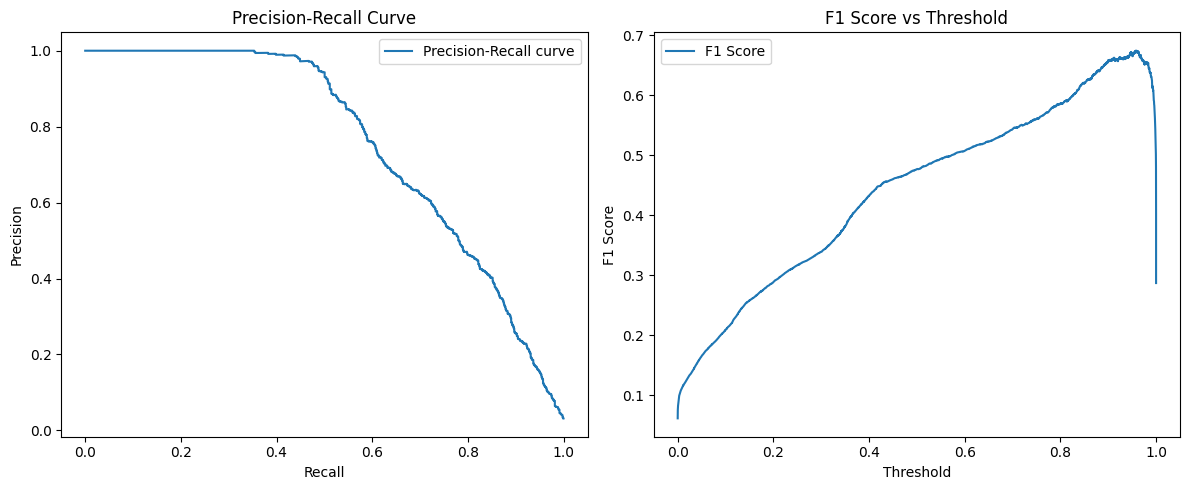

In [ ]:
import torch
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

model.eval()
all_labels = []
all_probs = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:  # test_loader는 테스트 데이터 DataLoader
        outputs = model(X_batch)
        probs = torch.sigmoid(outputs).cpu().numpy()  # 0~1 확률값으로 변환
        labels = y_batch.cpu().numpy()

        all_probs.extend(probs.flatten())
        all_labels.extend(labels.flatten())

all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# Precision-Recall curve 계산
precision, recall, thresholds = precision_recall_curve(all_labels, all_probs)
avg_precision = average_precision_score(all_labels, all_probs)

# F1-score 계산 (threshold 별로)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# 가장 좋은 F1-score와 해당 threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 1.0
best_f1 = f1_scores[best_idx]

print(f'Best F1-score: {best_f1:.4f} at threshold {best_threshold:.4f}')
print(f'Average Precision (AUPRC): {avg_precision:.4f}')

# 그래프 그리기
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')  # thresholds는 len = precision/recall -1 임
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()

plt.tight_layout()
plt.show()


### 임계값 변경

In [ ]:
# %%
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np # numpy 모듈 임포트

# 모델을 평가 모드로 설정
model.eval()

# 테스트 데이터셋 평가를 위한 리스트 초기화
all_test_preds = []
all_test_labels = []
all_test_probs = [] # 확률 값을 저장할 리스트

# 기울기 계산 비활성화
with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # DataLoader에서 이미 Tensor로 제공하므로 float()만 필요
        X_test = batch_X_test.float()
        # target은 unsqueeze(1)와 float() 필요 (손실 계산 시 필요하지만, 여기서는 레이블 수집만 함)
        # Y_test = batch_y_test.unsqueeze(1).float()

        # 모델 예측 (로짓)
        pre_test = model(X_test)

        # 예측값 (로짓)을 확률로 변환
        predicted_probs_test = torch.sigmoid(pre_test)

        # 결과 저장
        all_test_labels.extend(batch_y_test.cpu().numpy())
        all_test_probs.extend(predicted_probs_test.cpu().numpy())

# numpy 배열로 변환
all_test_labels = np.array(all_test_labels)
all_test_probs = np.array(all_test_probs).flatten() # 1차원 배열로 변환

# ✅ 최적 임계값 설정
optimal_threshold = best_threshold

# ✅ 최적 임계값을 사용하여 클래스 예측
predicted_classes_test_optimal = (all_test_probs > optimal_threshold).astype(float)

# 테스트 데이터셋에 대한 성능 지표 계산 (최적 임계값 사용)
test_accuracy_optimal = accuracy_score(all_test_labels, predicted_classes_test_optimal)
# zero_division=0 매개변수를 추가하여 분모가 0일 때 0을 반환하도록 함
test_precision_optimal = precision_score(all_test_labels, predicted_classes_test_optimal, zero_division=0)
test_recall_optimal = recall_score(all_test_labels, predicted_classes_test_optimal, zero_division=0)
test_f1_optimal = f1_score(all_test_labels, predicted_classes_test_optimal, zero_division=0)
test_conf_matrix_optimal = confusion_matrix(all_test_labels, predicted_classes_test_optimal)

# ✅ 테스트 성능 지표 출력 (최적 임계값 사용)
print(f"\n--- Test Set Evaluation (Threshold = {optimal_threshold:.4f}) ---")
print(f"Accuracy : {test_accuracy_optimal:.4f}")
print(f"Precision: {test_precision_optimal:.4f}")
print(f"Recall   : {test_recall_optimal:.4f}")
print(f"F1-Score : {test_f1_optimal:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix_optimal)


--- Test Set Evaluation (Threshold = 0.9583) ---
Accuracy : 0.9824
Precision: 0.8175
Recall   : 0.5725
F1-Score : 0.6734
Confusion Matrix:
[[28270   119]
 [  398   533]]


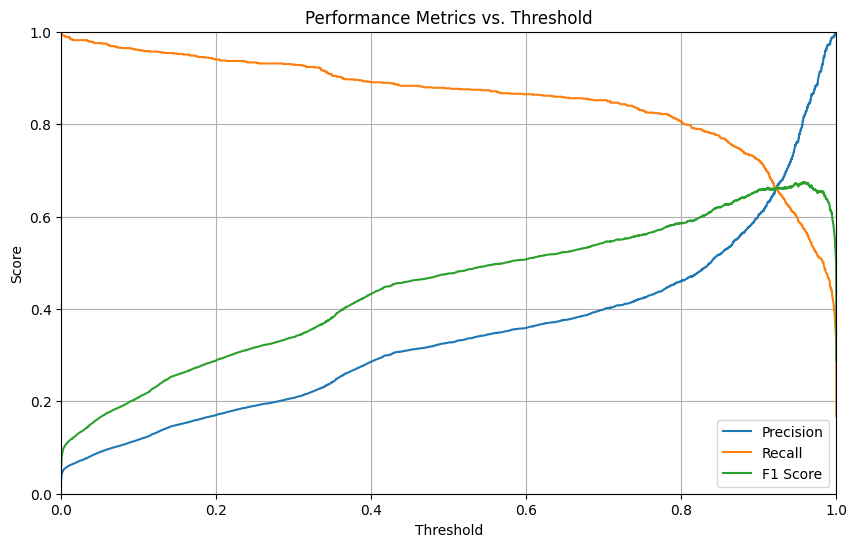

Best F1-score: 0.6742 at threshold 0.9583


In [ ]:
import torch
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score, accuracy_score # accuracy_score 임포트
import matplotlib.pyplot as plt
import numpy as np

model.eval()
all_labels = []
all_probs = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:  # test_loader는 테스트 데이터 DataLoader
        outputs = model(X_batch)
        probs = torch.sigmoid(outputs).cpu().numpy()  # 0~1 확률값으로 변환
        labels = y_batch.cpu().numpy()

        all_probs.extend(probs.flatten())
        all_labels.extend(labels.flatten())

all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

precision, recall, thresholds = precision_recall_curve(all_labels, all_probs)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(thresholds, precision[:-1], label='Precision') # precision[-1]은 임계값 0에 해당
plt.plot(thresholds, recall[:-1], label='Recall')     # recall[-1]은 임계값 0에 해당
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')


plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.xlim([0.0, 1.0]) # x축 범위를 0부터 1까지로 설정
plt.ylim([0.0, 1.0]) # y축 범위를 0부터 1까지로 설정
plt.show()

# 선택적으로 최적 F1-score 및 해당 임계값 출력
best_idx = np.argmax(f1_scores)
# thresholds 배열은 precision, recall 배열보다 길이가 1 짧으므로,
# best_idx가 마지막 인덱스일 경우 thresholds의 마지막 값을 사용하거나 1.0을 사용합니다.
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 1.0
best_f1 = f1_scores[best_idx]
print(f'Best F1-score: {best_f1:.4f} at threshold {best_threshold:.4f}')

avg_precision = average_precision_score(all_labels, all_probs)

✅ Threshold where Precision and Recall are closest: 0.9228
   - Precision at this threshold: 0.6617
   - Recall at this threshold: 0.6617
   - F1-Score at this threshold: 0.6617

--- Test Set Evaluation (Threshold = 0.9228) ---
Accuracy : 0.9785
Precision: 0.6613
Recall   : 0.6606
F1-Score : 0.6609
Confusion Matrix:
[[28074   315]
 [  316   615]]


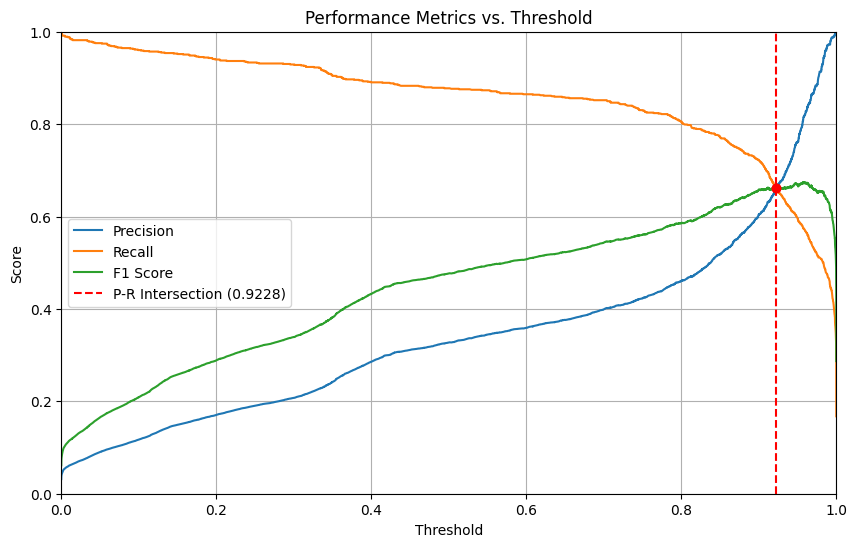

Best F1-score: 0.6742 at threshold 0.9583


In [ ]:
import torch
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score, accuracy_score, confusion_matrix, recall_score, precision_score # 필요한 모든 메트릭 임포트
import matplotlib.pyplot as plt
import numpy as np

model.eval()
all_labels = []
all_probs = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        probs = torch.sigmoid(outputs).cpu().numpy()
        labels = y_batch.cpu().numpy()

        all_probs.extend(probs.flatten())
        all_labels.extend(labels.flatten())

all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# Precision-Recall 곡선 및 임계값 계산
precision, recall, thresholds = precision_recall_curve(all_labels, all_probs)

# F1-score 계산 (그래프를 위해)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# ✅ Precision과 Recall이 가장 가까워지는 (교차점 근처) 임계값 찾기
# thresholds 배열은 precision, recall 배열보다 길이가 1 짧습니다.
# 따라서 마지막 precision/recall 값 (threshold=0에 해당)은 제외하고 비교합니다.
# abs(precision - recall)이 최소가 되는 인덱스를 찾습니다.
diffs = np.abs(precision[:-1] - recall[:-1])
closest_idx = np.argmin(diffs)

# 교차점 근처의 임계값
intersection_threshold = thresholds[closest_idx]

print(f'✅ Threshold where Precision and Recall are closest: {intersection_threshold:.4f}')
print(f'   - Precision at this threshold: {precision[closest_idx]:.4f}')
print(f'   - Recall at this threshold: {recall[closest_idx]:.4f}')
print(f'   - F1-Score at this threshold: {f1_scores[closest_idx]:.4f}')


# ✅ 교차점 근처의 임계값으로 성능 평가
optimal_threshold = intersection_threshold

# ✅ 설정된 임계값을 사용하여 클래스 예측
predicted_classes_test_optimal = (all_probs > optimal_threshold).astype(float)

# 테스트 데이터셋 성능 지표 계산 및 출력
test_accuracy_optimal = accuracy_score(all_labels, predicted_classes_test_optimal)
test_precision_optimal = precision_score(all_labels, predicted_classes_test_optimal, zero_division=0)
test_recall_optimal = recall_score(all_labels, predicted_classes_test_optimal, zero_division=0)
test_f1_optimal = f1_score(all_labels, predicted_classes_test_optimal, zero_division=0)
test_conf_matrix_optimal = confusion_matrix(all_labels, predicted_classes_test_optimal)

print(f"\n--- Test Set Evaluation (Threshold = {optimal_threshold:.4f}) ---")
print(f"Accuracy : {test_accuracy_optimal:.4f}")
print(f"Precision: {test_precision_optimal:.4f}")
print(f"Recall   : {test_recall_optimal:.4f}")
print(f"F1-Score : {test_f1_optimal:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix_optimal)


# --- 그래프 그리기 (이전 코드와 동일) ---
plt.figure(figsize=(10, 6))

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')

# 교차점 근처에 마커 표시
plt.axvline(intersection_threshold, color='red', linestyle='--', label=f'P-R Intersection ({intersection_threshold:.4f})')
plt.plot(intersection_threshold, precision[closest_idx], 'ro') # 마커 추가
plt.plot(intersection_threshold, recall[closest_idx], 'ro') # 마커 추가


plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

# 선택적으로 최적 F1-score 및 해당 임계값 출력
best_idx = np.argmax(f1_scores)
best_threshold_f1 = thresholds[best_idx] if best_idx < len(thresholds) else 1.0 # 변수명 충돌 방지
best_f1 = f1_scores[best_idx]
print(f'Best F1-score: {best_f1:.4f} at threshold {best_threshold_f1:.4f}')

# 모델 저장

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 모델 저장
torch.save(model.state_dict(), "safeAI_model.pth")

In [8]:
class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = X if isinstance(X, torch.Tensor) else torch.tensor(X, dtype=torch.float32)
        self.y = y if isinstance(y, torch.Tensor) else torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ✅ 모델 구조 정의 (학습과 동일하게!)
model1 = nn.Sequential(
    nn.Linear(29, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

# ✅ 저장된 파라미터 로딩
model1.load_state_dict(torch.load("safeAI_model.pth"))
model1.eval()

# ✅ 평가용 데이터로 DataLoader 생성
test_dataset = TabularDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

# ✅ 예측 수행
threshold = best_threshold_f1
all_preds = []
all_probs = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        logits = model1(X_batch)
        probs = torch.sigmoid(logits)
        preds = (probs > threshold).float()

        all_probs.extend(probs.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# ✅ 평가 지표 계산
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, zero_division=0)
recall = recall_score(all_labels, all_preds, zero_division=0)
f1 = f1_score(all_labels, all_preds, zero_division=0)

# ✅ 출력 형식 맞추기
print(f"--- Test Set Evaluation (Threshold = {threshold:.4f}) ---")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

--- Test Set Evaluation (Threshold = 0.9583) ---
Accuracy : 0.9824
Precision: 0.8175
Recall   : 0.5725
F1-Score : 0.6734


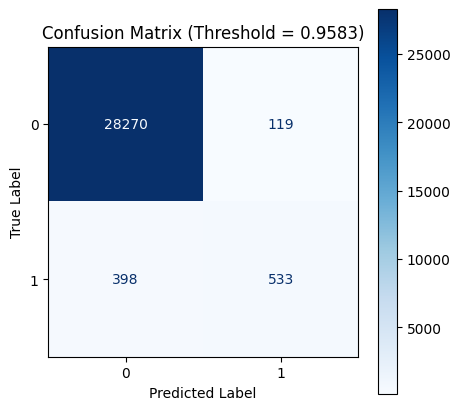

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# 혼동 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# ConfusionMatrixDisplay를 사용하여 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(5,5)) # 그래프 크기 조정
disp.plot(cmap=plt.cm.Blues, ax=ax) # 컬러맵 설정
plt.title(f"Confusion Matrix (Threshold = {threshold:.4f})") # 제목 추가
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

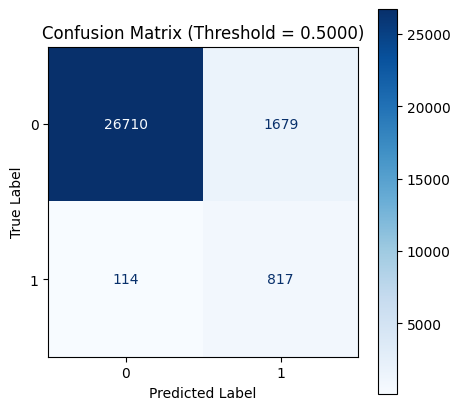


--- Test Set Evaluation (Threshold = 0.5000) ---
Accuracy : 0.9388
Precision: 0.3273
Recall   : 0.8776
F1-Score : 0.4768
Confusion Matrix:
[[26710  1679]
 [  114   817]]


In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# ✅ 임계값 0.5 설정
threshold_0_5 = 0.5

# ✅ 임계값 0.5를 사용하여 클래스 예측
predicted_classes_0_5 = (np.array(all_probs) > threshold_0_5).astype(float)

# ✅ 혼동 행렬 계산 (임계값 0.5 사용)
cm_0_5 = confusion_matrix(all_labels, predicted_classes_0_5)

# ✅ ConfusionMatrixDisplay를 사용하여 혼동 행렬 시각화 (임계값 0.5 사용)
disp_0_5 = ConfusionMatrixDisplay(confusion_matrix=cm_0_5)

# 그래프 그리기
fig_0_5, ax_0_5 = plt.subplots(figsize=(5,5)) # 그래프 크기 조정
disp_0_5.plot(cmap=plt.cm.Blues, ax=ax_0_5) # 컬러맵 설정


plt.title(f"Confusion Matrix (Threshold = {threshold_0_5:.4f})") # 제목 추가
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ✅ 임계값 0.5에서의 성능 지표 계산 및 출력
accuracy_0_5 = accuracy_score(all_labels, predicted_classes_0_5)
# zero_division=0 매개변수를 추가하여 분모가 0일 때 0을 반환하도록 함
precision_0_5 = precision_score(all_labels, predicted_classes_0_5, zero_division=0)
recall_0_5 = recall_score(all_labels, predicted_classes_0_5, zero_division=0)
f1_0_5 = f1_score(all_labels, predicted_classes_0_5, zero_division=0)

print(f"\n--- Test Set Evaluation (Threshold = {threshold_0_5:.4f}) ---")
print(f"Accuracy : {accuracy_0_5:.4f}")
print(f"Precision: {precision_0_5:.4f}")
print(f"Recall   : {recall_0_5:.4f}")
print(f"F1-Score : {f1_0_5:.4f}")
print("Confusion Matrix:")
print(cm_0_5)

AUC = 0.9656


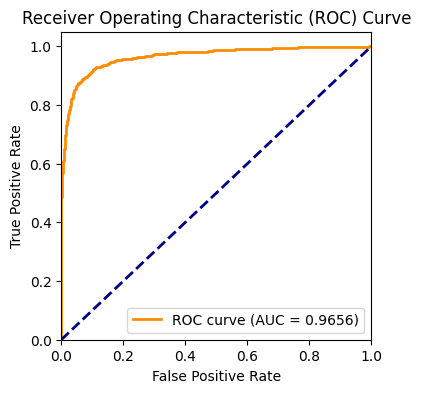

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import torch

# 모델이 이미 정의되고 학습되었다고 가정합니다.
# model1 이라는 변수로 모델에 접근할 수 있어야 합니다.

# 모델을 평가 모드로 설정
model1.eval()

with torch.no_grad():
    y_true = []
    y_prob = []

    # test_loader는 테스트 데이터의 DataLoader입니다.
    for X_batch, y_batch in test_loader:
        outputs = model1(X_batch)              # 모델 예측 (로짓)
        probs = torch.sigmoid(outputs)        # 로짓을 확률로 변환

        y_true.extend(y_batch.tolist())
        y_prob.extend(probs.squeeze().tolist()) # 확률 값을 리스트에 추가 (1차원으로)

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import torch

# 모델이 이미 정의되고 학습되었다고 가정합니다.
# model1 이라는 변수로 모델에 접근할 수 있어야 합니다.

# 모델을 평가 모드로 설정
model1.eval()

with torch.no_grad():
    y_true = []
    y_prob = []

    # test_loader는 테스트 데이터의 DataLoader입니다.
    for X_batch, y_batch in test_loader:
        outputs = model1(X_batch)              # 모델 예측 (로짓)
        probs = torch.sigmoid(outputs)        # 로짓을 확률로 변환

        y_true.extend(y_batch.tolist())
        y_prob.extend(probs.squeeze().tolist()) # 확률 값을 리스트에 추가 (1차원으로)

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

print(f'AUC = {roc_auc:.4f}')

# ROC Curve 그리기
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # 대각선 (랜덤 분류기)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()